In [5]:
import pandas as pd
corona_df = pd.read_csv('../csv/corona.csv')  ## ./: 현재 작업중인 폴더에서 csv파일에서 corona.csv파일을 실행시킴

In [6]:
corona_df.sort_values("createDt", inplace=True)  ##2번 createDt를 기준으로 오름차순 정렬 
corona_df.reset_index(drop=True, inplace=True)    ##3번 index 값 초기화 기존 인덱스 삭제, 변경된 index저장
corona_df.drop("Unnamed: 0", axis=1,inplace=True) ##unnamed: 0 (띄어쓰기 주의)

In [7]:
corona_df.columns = ["등록일시","사망자","확진자","게시글번호","기준일","기준시간",
                    "수정일시","누적의심자","누적확진률"]
corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000


In [8]:
##결측치 확인
corona_df.isna().sum()

등록일시       0
사망자        0
확진자        0
게시글번호      0
기준일        0
기준시간       0
수정일시       3
누적의심자    128
누적확진률    197
dtype: int64

## describe() 함수에서 요약 정보

1.count : 컬럼별 데이터의 개수

2.mean : 컬럼별 데이터의 평균 값

3.std : 컬럼별 데이터의 표준편차

4.min : 컬럼별 데이터의 최소값

5.max : 컬럼별 데이터의 최대값

6.25%, 50%, 75% : 컬럼별 백분위수의 각 지점의 값, 분포를 반영해서 평균을 보완하는 목적으로 사용

In [9]:
corona_df.describe()
corona_df 

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000
...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN


In [19]:
## 일일 확진자라는 파생변수를 생성
## 일일 확진자라는 수치는 당일 누적 확진자 수 - 전날 누적 확진자 수 = 일일 확진자 수

corona_df["일일확진자"] = (corona_df["확진자"] - corona_df["확진자"].shift())
corona_df.head()


,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일사망자,일일확진자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,NaN,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6.0,242.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,6.0,114.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,1.0,110.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,5.0,107.0


## shifht()
1.shifht(n) ->n을 공란으로 두면 기본값이 1 인덱스를 1아래인 값을 뜻한다. 

2.n의 값이 존재 하면 n값만큼 인덱스를 이동하여 그 행의 값을 가지고 온다.
 

## diff()
1.한 객채내에서 열과 열/행과 행차이를 출력

In [20]:
##일일 확진자 파생변수 생성 완료
##일일사망자 파생변수 만들기 

corona_df["일일사망자"] = corona_df["사망자"].diff()
corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일사망자,일일확진자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,NaN,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6.0,242.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,6.0,114.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,1.0,110.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,5.0,107.0


In [21]:
# 중간점검. 일일확진자,일일사망자 삭제

corona_df.drop(["일일확진자","일일사망자"], axis=1, inplace=True)
corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000


## fillna()

1.NaN이라는 값에 ()안에 들어가는 값으로 대체를 한다.


In [22]:
corona_df["일일확진자"] = (corona_df["확진자"] - corona_df["확진자"].shift()).fillna(0)
corona_df["일일사망자"] = corona_df["사망자"].diff().fillna(0)
corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0


ffill : 전의 행의 값을 채워준다. 
bfill : 뒤의 행의 값을 채워준다. 

In [23]:
## 일일확진자,일일사망자의 통계량 확인
corona_df["일일확진자"].describe()

count       820.000000
mean      22171.569512
std       71013.854189
min        -430.000000
25%         125.000000
50%         642.500000
75%        2782.750000
max      621204.000000
Name: 일일확진자, dtype: float64

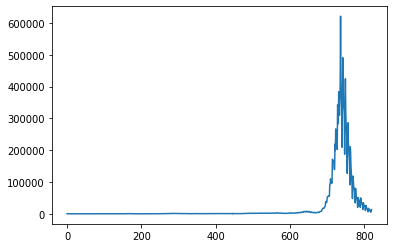

In [24]:
# 데이터 시각화(matplot사용)
import matplotlib.pyplot as plt

decide_cnt = corona_df["일일확진자"].values.tolist()
plt.plot(decide_cnt)
plt.show()

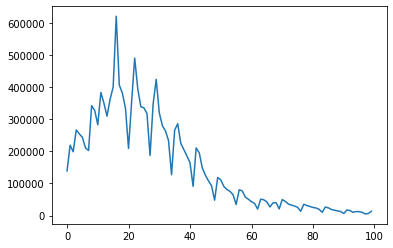

In [41]:
# 데이터 시각화(matplot사용)
import matplotlib.pyplot as plt

decide_cnt = corona_df.tail(100)["일일확진자"].values.tolist()
plt.plot(decide_cnt)
plt.show()

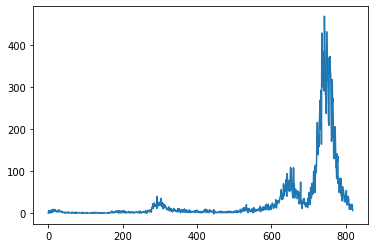

In [42]:
death_cnt = corona_df["일일사망자"].values.tolist()
plt.plot(death_cnt)
plt.show()   

## fillna()
1. ()값을 넣으면 Nan에 값이 대입
2. method 속성 ffill, bfill -> fill
3. ffill -> 앞의 값으로 대체 bfill ->뒤의 값으로 대체

In [ ]:
corona_df.head(200)

In [ ]:
#값을 대체해서 계속 채워줌

corona_df.fillna(method="ffill").tail(20)

In [ ]:
corona_df.fillna(method="bfill").tail(20)           ## 뒤에 채워주는 값이 없어서 그럴 수 있음 

In [27]:
## 코로나의 누적확진자의 갯수를 넣어주는 함수

corona_df["누적의심자"].fillna(max(corona_df["누적의심자"]))
corona_df["누적의심자"].fillna(method="ffill")

0        210144.0
1        222395.0
2        234998.0
3        248647.0
4        261335.0
          ...    
815    21518073.0
816    21518073.0
817    21518073.0
818    21518073.0
819    21518073.0
Name: 누적의심자, Length: 820, dtype: float64

In [47]:
## 코로나의 누적확진자의 갯수를 넣어주는 함수. 상대적으로 평균치들을 넣어줘야 손상이 덜 감

corona_df["누적확진률"].fillna(corona_df["누적확진률"].mean())

0      3.919308
1      3.804175
2      3.621744
3      3.458499
4      3.318000
         ...   
815    1.556435
816    1.556435
817    1.556435
818    1.556435
819    1.556435
Name: 누적확진률, Length: 820, dtype: float64

In [48]:
corona_df["일일확진자"].describe()

count       820.000000
mean      22171.569512
std       71013.854189
min        -430.000000
25%         125.000000
50%         642.500000
75%        2782.750000
max      621204.000000
Name: 일일확진자, dtype: float64

In [49]:
corona_df.query("일일확진자 < 0")                ##일일확진자가 -인 값이 1개 출력됨

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0


In [50]:
corona_df.query("일일사망자 < 0")                ##시스템상의 문제 (등록일시의 오류)

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0


,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
444,2021-05-29 00:00:00.000,1951,139427,496,20210529,00:00,2021-10-07 10:30:51.51,9733588.0,1.450884,533.0,5.0
445,2021-05-30 00:00:00.0,1959,140337,498,20210531,00:00,2021-10-14 13:48:56.821,9761156.0,1.456805,910.0,8.0
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0
447,2021-06-01 00:00:00.000,1963,140796,499,20210601,00:00,2021-10-07 10:30:51.51,9798400.0,1.455890,889.0,6.0
448,2021-06-02 00:00:00.000,1965,141473,500,20210602,00:00,2021-10-07 10:30:51.51,9834348.0,1.457668,677.0,2.0


## apply()
1. 칼럼에 있는 각 원소들에 연산을 해주는 함수

In [52]:
corona_df["누적확진률"].describe()

count    623.000000
mean       1.556435
std        0.543014
min        0.902205
25%        1.078089
50%        1.416159
75%        1.816009
max        3.919308
Name: 누적확진률, dtype: float64

lambda함수

1.lambda 매개변수: 표현식  (if라는 표현식을 더 간단하게 사용하기 위해 사용하는 함수)

In [53]:
corona_df["H/L"] = corona_df["누적확진률"].apply(lambda x: "High" if (x > 1.556) else "Low")

In [54]:
def H_and_L(x):
    if x > 1.556:
        return "High"
    else:
        return "Low"

corona_df["H/L"] = corona_df["누적확진률"].apply(H_and_L)

##인자값이 1개이기 때문에 x= H_and_L 이 자동설정됨 apply(x)로 사용되기도 함

In [55]:
corona_df["H/L"].describe()

count     820
unique      2
top       Low
freq      617
Name: H/L, dtype: object

In [56]:
corona_df["H/L"].value_counts()

Low     617
High    203
Name: H/L, dtype: int64

In [1]:
corona_df.tail()

NameError: name 'corona_df' is not defined

In [58]:
corona_df["일일확진자"].apply(lambda x: "np.Nan" if (x < 0) else x)

0          0.0
1        242.0
2        114.0
3        110.0
4        107.0
        ...   
815    12039.0
816     9834.0
817     5022.0
818     6172.0
819    13358.0
Name: 일일확진자, Length: 820, dtype: object

In [59]:
corona_df["일일확진자"]=corona_df["일일확진자"].apply(lambda x: np.NaN if (x < 0) else x)       ##함수 반드시 기입하기

In [60]:
corona_df.query("일일사망자 < 0")     

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,NaN,-2.0,Low


In [81]:
corona_df.loc[corona_df["일일확진자"].isna()]           ##cornona_df가 변수(주소)>> 코드를 짤 때 쉽게 가져올 수 있도록 임의로 지정하는 것이 변수

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L,요일
446,2021-05-30,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,NaN,-2.0,Low,NaN


In [62]:
## 등록일시 --> string --> 시계열 데이터
corona_df["등록일시"] = pd.to_datetime(corona_df["등록일시"])

In [63]:
corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,High
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High


In [64]:
## 표에 대한 요일을 coloumn을 생성
## 요일을 숫자로 표현해서 '요일'칼럼에 삽입.
## 0 ->월  1 ->화, ... 6 ->일

corona_df["요일"] = corona_df["등록일시"].dt.weekday
corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L,요일
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,High,1
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High,2
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High,3
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High,4
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High,5


In [65]:
##1. '요일' 칼럼의 값을 apply함수를 사용해서 숫자형태는 문자의 형태 월,...,일로 표기를 바꿔보시오. 

In [66]:
def week_change(x):
    if x == 0:
        return "월"
    elif x == 1:
        return "화"
    elif x == 2:
        return "수"
    elif x == 3:
        return "목"
    elif x == 4:
        return "금"
    elif x == 5:
        return "토"
    else:
        return np.NaN

corona_df["요일"].apply(week_change)
corona_df["요일"]=corona_df["요일"].apply(week_change)

##클래스에 만들어 두면 편함

In [67]:
corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L,요일
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,High,화
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High,수
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High,목
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High,금
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High,토


In [68]:
## 요일이라는 파생변수를 통해서
## 요일별 확진자의 평균을 구해서 시각화
mean_corona = corona_df.groupby("요일").mean()

<module 'matplotlib.pyplot' from 'c:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

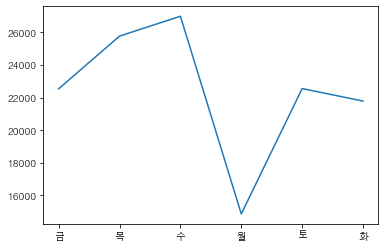

In [69]:
## mean_corona 라는 열 안에 '일일 확진자'로 변경
## 처음 실행시 요일이 "한글"이기 때문에 안나옴
## matplotlib에서 한글 함수로 변환 가능
from matplotlib import font_manager, rc
font_path = "C:/windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname= font_path).get_name()
rc('font',family = font)

y = mean_corona["일일확진자"].to_list()
x = mean_corona.index

plt.plot(x, y)
plt

In [70]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [71]:
import yfinance as yf

In [72]:
yf.download('AAPL',start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.177803,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.221363,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.414242,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.883358,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.803490,219111200
...,...,...,...,...,...,...
2022-06-02,147.830002,151.270004,146.860001,151.210007,151.210007,72348100
2022-06-03,146.899994,147.970001,144.460007,145.380005,145.380005,88471400
2022-06-06,147.029999,148.570007,144.899994,146.139999,146.139999,71598400


In [73]:
yf.download(['AAPL','TSLA','AMZN','CPNG'],start='2019-01-01')

[*********************100%***********************]  4 of 4 completed


Adj Close                                      Close              \
                  AAPL        AMZN   CPNG        TSLA        AAPL        AMZN   
Date                                                                            
2018-12-31   38.177803   75.098503    NaN   66.559998   39.435001   75.098503   
2019-01-02   38.221359   76.956497    NaN   62.023998   39.480000   76.956497   
2019-01-03   34.414230   75.014000    NaN   60.071999   35.547501   75.014000   
2019-01-04   35.883350   78.769501    NaN   63.537998   37.064999   78.769501   
2019-01-07   35.803486   81.475502    NaN   66.991997   36.982498   81.475502   
...                ...         ...    ...         ...         ...         ...   
2022-06-02  151.210007  125.511002  13.18  775.000000  151.210007  125.511002   
2022-06-03  145.380005  122.349998  12.64  703.549988  145.380005  122.349998   
2022-06-06  146.139999  124.790001  12.79  714.840027  146.139999  124.790001   
2022-06-07  148.710007  123.000000  12.16  716.659973  148.710007  123.000000   
2022-06-08  147.960007  121.180000  12.95  725.599976  147.960007  121.180000   

                                     High              ...     Low  \
             CPNG        TSLA        AAPL        AMZN  ...    CPNG   
Date                                                   ...           
2018-12-31    NaN   66.559998   39.840000   76.038002  ...     NaN   
2019-01-02    NaN   62.023998   39.712502   77.667999  ...     NaN   
2019-01-03    NaN   60.071999   36.430000   76.900002  ...     NaN   
2019-01-04    NaN   63.537998   37.137501   79.699997  ...     NaN   
2019-01-07    NaN   66.991997   37.207500   81.727997  ...     NaN   
...           ...         ...         ...         ...  ...     ...   
2022-06-02  13.18  775.000000  151.270004  125.610001  ...  12.745   
2022-06-03  12.64  703.549988  147.970001  124.400002  ...  12.200   
2022-06-06  12.79  714.840027  148.570007  128.990005  ...  12.605   
2022-06-07  12.16  716.659973  149.000000  124.099998  ...  12.010   
2022-06-08  12.95  725.599976  149.869995  123.750000  ...  12.140   

                              Open                                    Volume  \
                  TSLA        AAPL        AMZN   CPNG        TSLA       AAPL   
Date                                                                           
2018-12-31   65.052002   39.632500   75.540001    NaN   67.557999  140014000   
2019-01-02   59.759998   38.722500   73.260002    NaN   61.220001  148158800   
2019-01-03   59.476002   35.994999   76.000504    NaN   61.400002  365248800   
2019-01-04   60.546001   36.132500   76.500000    NaN   61.200001  234428400   
2019-01-07   63.549999   37.174999   80.115501    NaN   64.344002  219111200   
...                ...         ...         ...    ...         ...        ...   
2022-06-02  726.200012  147.830002  121.683998  12.85  732.469971   72348100   
2022-06-03  700.250000  146.899994  124.199997  12.96  729.679993   88471400   
2022-06-06  703.049988  147.029999  125.250000  12.99  733.059998   71598400   
2022-06-07  690.280029  144.350006  122.010002  12.51  702.000000   67808200   
2022-06-08  717.530029  148.580002  122.610001  12.20  720.260010   53895900   

                                             
                 AMZN        CPNG      TSLA  
Date                                         
2018-12-31  139090000         NaN  31511500  
2019-01-02  159662000         NaN  58293000  
2019-01-03  139512000         NaN  34826000  
2019-01-04  183652000         NaN  36970500  
2019-01-07  159864000         NaN  37756000  
...               ...         ...       ...  
2022-06-02  100560000   7429900.0  31157700  
2022-06-03   97604000   8640300.0  37348100  
2022-06-06  135269000   6036600.0  28068200  
2022-06-07   85156700  11478500.0  24269500  
2022-06-08   64828200   8159300.0  25339600  

[867 rows x 24 columns]

In [74]:
data = yf.download(["AAPL","TSLA","AMZN","CPNG"],start ="2019-01-01")
data

[*********************100%***********************]  4 of 4 completed


Adj Close                                      Close              \
                  AAPL        AMZN   CPNG        TSLA        AAPL        AMZN   
Date                                                                            
2018-12-31   38.177811   75.098503    NaN   66.559998   39.435001   75.098503   
2019-01-02   38.221371   76.956497    NaN   62.023998   39.480000   76.956497   
2019-01-03   34.414246   75.014000    NaN   60.071999   35.547501   75.014000   
2019-01-04   35.883362   78.769501    NaN   63.537998   37.064999   78.769501   
2019-01-07   35.803486   81.475502    NaN   66.991997   36.982498   81.475502   
...                ...         ...    ...         ...         ...         ...   
2022-06-02  151.210007  125.511002  13.18  775.000000  151.210007  125.511002   
2022-06-03  145.380005  122.349998  12.64  703.549988  145.380005  122.349998   
2022-06-06  146.139999  124.790001  12.79  714.840027  146.139999  124.790001   
2022-06-07  148.710007  123.000000  12.16  716.659973  148.710007  123.000000   
2022-06-08  147.960007  121.180000  12.95  725.599976  147.960007  121.180000   

                                     High              ...     Low  \
             CPNG        TSLA        AAPL        AMZN  ...    CPNG   
Date                                                   ...           
2018-12-31    NaN   66.559998   39.840000   76.038002  ...     NaN   
2019-01-02    NaN   62.023998   39.712502   77.667999  ...     NaN   
2019-01-03    NaN   60.071999   36.430000   76.900002  ...     NaN   
2019-01-04    NaN   63.537998   37.137501   79.699997  ...     NaN   
2019-01-07    NaN   66.991997   37.207500   81.727997  ...     NaN   
...           ...         ...         ...         ...  ...     ...   
2022-06-02  13.18  775.000000  151.270004  125.610001  ...  12.745   
2022-06-03  12.64  703.549988  147.970001  124.400002  ...  12.200   
2022-06-06  12.79  714.840027  148.570007  128.990005  ...  12.605   
2022-06-07  12.16  716.659973  149.000000  124.099998  ...  12.010   
2022-06-08  12.95  725.599976  149.869995  123.750000  ...  12.140   

                              Open                                    Volume  \
                  TSLA        AAPL        AMZN   CPNG        TSLA       AAPL   
Date                                                                           
2018-12-31   65.052002   39.632500   75.540001    NaN   67.557999  140014000   
2019-01-02   59.759998   38.722500   73.260002    NaN   61.220001  148158800   
2019-01-03   59.476002   35.994999   76.000504    NaN   61.400002  365248800   
2019-01-04   60.546001   36.132500   76.500000    NaN   61.200001  234428400   
2019-01-07   63.549999   37.174999   80.115501    NaN   64.344002  219111200   
...                ...         ...         ...    ...         ...        ...   
2022-06-02  726.200012  147.830002  121.683998  12.85  732.469971   72348100   
2022-06-03  700.250000  146.899994  124.199997  12.96  729.679993   88471400   
2022-06-06  703.049988  147.029999  125.250000  12.99  733.059998   71598400   
2022-06-07  690.280029  144.350006  122.010002  12.51  702.000000   67808200   
2022-06-08  717.530029  148.580002  122.610001  12.20  720.260010   53895900   

                                             
                 AMZN        CPNG      TSLA  
Date                                         
2018-12-31  139090000         NaN  31511500  
2019-01-02  159662000         NaN  58293000  
2019-01-03  139512000         NaN  34826000  
2019-01-04  183652000         NaN  36970500  
2019-01-07  159864000         NaN  37756000  
...               ...         ...       ...  
2022-06-02  100560000   7429900.0  31157700  
2022-06-03   97604000   8640300.0  37348100  
2022-06-06  135269000   6036600.0  28068200  
2022-06-07   85156700  11478500.0  24269500  
2022-06-08   64828200   8159300.0  25339600  

[867 rows x 24 columns]

In [75]:
aapl = yf.Ticker("AAPL")
aapl

yfinance.Ticker object <AAPL>

In [76]:
aapl.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 154000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [77]:
import pandas as pd

## 본인들이 원하는 주식의 정보 1개를 가지고 와서 작업(데이터의 개수는 1000개)
1. 칼럼의 이름을 open,close,high,low 소수점 2째 자리까지 유지하고 3째자리 반올림
2. NaN값이 존재하면 시가로 변환
3. 파생변수 생성 등락폭(종가 - 시가)를 삽입
4. 파생변수 생성 등락율(등락폭/시가 * 100)을 삽입
5. 시가 / 종가 / 등락폭 / 등락률 / 볼륨 그래프 plot그래프 subplot 사용해서 시각화

In [ ]:
#2. NaN값이 존재하면 시가로 변환
data[["Open", "High","Low","Close"]]=data[["Open", "High","Low","Close"]].round(2)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,1057.83,1062.99,1033.04,1044.96,1044.959961,1655500
2019-01-02,1027.20,1060.79,1025.28,1054.68,1054.680054,1593400
2019-01-03,1050.67,1066.26,1022.37,1025.47,1025.469971,2098000
2019-01-04,1042.56,1080.00,1036.86,1078.07,1078.069946,2301100
2019-01-07,1080.97,1082.70,1062.64,1075.92,1075.920044,2372300


In [ ]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#3. 파생변수 생성 등락폭(종가 - 시가)를 삽입
data["등락폭"]=data["Close"]-data["Open"]
#4. 파생변수 생성 등락율(등락폭/시가 * 100)을 삽입
data["등락율"]=data["등락폭"]/data["Open"]*100
data.head()

In [ ]:
#5. 시가 / 종가 / 등락폭 / 등락률 / 볼륨 그래프 plot그래프 subplot 사용해서 시각화

data_1 = data["Open"].tolist()
data_2 = data["Close"].tolist()
data_3 = data["등락폭"].tolist()
data_4 = data["Volume"].tolist()
data_5 = data["등락율"].tolist()

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


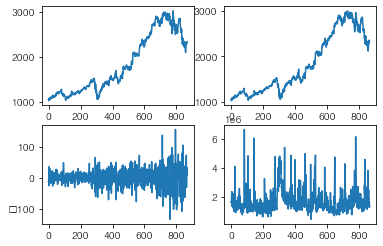

In [80]:
plt.subplot(2,2,1)  #2X2 에서 1번째 영역 설정
plt.plot(data_1)
plt.subplot(2,2,2)
plt.plot(data_2)
plt.subplot(2,2,3)
plt.plot(data_3)
plt.subplot(2,2,4)
plt.plot(data_4)

plt.show()